In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.style.use("ggplot")

## Synthetic Data Generation 

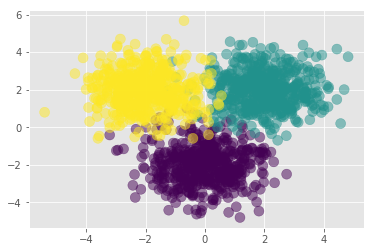

In [6]:
Nsample = 500  # The number of samples per class (3 classes)

# Three 2D gaussian 
X1 = np.random.randn(Nsample, 2) + np.array([ 0,-2])
X2 = np.random.randn(Nsample, 2) + np.array([ 2, 2])
X3 = np.random.randn(Nsample, 2) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*Nsample + [1]*Nsample + [2]*Nsample)

# scatter plot 
plt.scatter( X[:,0], X[:,1], c=Y, s=100, alpha=0.5);

## Layers Initialization  
For simplicity, this sample uses only 1 hidden layer, with 3 units.   

In [31]:
D = 2  # dimension of input 
M = 3  # hidden layer size 
K = 3  # number of output classes 

W1 = np.random.randn(D,M) 
b1 = np.random.randn(M) 
W2 = np.random.randn(M,K) 
b2 = np.random.randn(K) 

## Sigmoid As Activation Function at Hidden Layer  

In [8]:
def sigmoid(a): 
    return 1 / (1 + np.exp(-a))

## Softmax 

In [13]:
def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

## Forward Propagation  

In [10]:
def forward(X, W1, b1, W2, b2): 
    Z = sigmoid(X.dot(W1) + b1) 
    A = Z.dot(W2) + b2 
    Y = softmax(A) 
    return Y 

## Classification Rate (accuracy) 

In [11]:
def classification_rate(Y, P): 
    return (Y == P).mean() 

## Run Test   
No training, so classification rate will be randomly bad.  

In [32]:
P_Y_given_X = forward(X, W1, b1, W2, b2) 
P = np.argmax( P_Y_given_X, axis=1 )  # maximum across each row - column index of the maximum 
print("Classification Rate :", classification_rate( Y, P) )
print(P.shape, Y.shape)

Classification Rate : 0.6726666666666666
(1500,) (1500,)


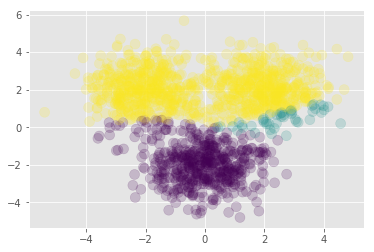

In [33]:
# scatter plot (output from ANN not trained at all)
plt.scatter( X[:,0], X[:,1], c=P, s=100, alpha=0.2);

In [34]:
len(P[P==0]), len(P[P==1]), len(P[P==2])

(515, 46, 939)